# Google Earth Engine

### Setup Instructions


First, we need to install the following packages: 1) the `google-cloud-sdk`, and 2) the `earthengine-api`.

```bash
conda install -c conda-forge google-cloud-sdk earthengine-api
```

Next, we need to authenticate our account on the google Earth-Engine platform.
If you do not have an account, you can create an [academic account](https://earthengine.google.com/noncommercial/) for free or a [commerical](https://earthengine.google.com/commercial/) where there are extra features for paid services.

Nevertheless, you need to login to the gmail account of your group.
```bash
gcloud auth login
```

Then, you need to authenticate the EE account.

```bash
earthengine authenticate
```

After this, you should be good to go!

### Package Pre-amble

In [2]:
import autoroot
import os
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# Code of your application, which uses environment variables (e.g. from `os.environ` or
# `os.getenv`) as if they came from the actual environment.
import ee
import xarray as xr
from geo_toolz._src.data.reanalysis.gee import download_era5_gee
from geo_toolz._src.discretize.grid import RegularLonLat

### GEE Initialization

In [3]:
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com', )

### Open Data

In [4]:
ds = xr.open_dataset('ee://ECMWF/ERA5_LAND/MONTHLY_AGGR', engine='ee', crs='EPSG:4326', scale=0.25)

In [5]:
ds

<xarray.Dataset>
Dimensions:                                                    (time: 887,
                                                                lon: 1440,
                                                                lat: 720)
Coordinates:
  * time                                                       (time) datetime64[ns] ...
  * lon                                                        (lon) float32 ...
  * lat                                                        (lat) float32 ...
Data variables: (12/150)
    dewpoint_temperature_2m                                    (time, lon, lat) float32 ...
    temperature_2m                                             (time, lon, lat) float32 ...
    skin_temperature                                           (time, lon, lat) float32 ...
    soil_temperature_level_1                                   (time, lon, lat) float32 ...
    soil_temperature_level_2                                   (time, lon, lat) float32 ...
    soil_temperature_level_3                                   (time, lon, lat) float32 ...
    ...                                                         ...
    total_precipitation_min                                    (time, lon, lat) float32 ...
    total_precipitation_max                                    (time, lon, lat) float32 ...
    leaf_area_index_high_vegetation_min                        (time, lon, lat) float32 ...
    leaf_area_index_high_vegetation_max                        (time, lon, lat) float32 ...
    leaf_area_index_low_vegetation_min                         (time, lon, lat) float32 ...
    leaf_area_index_low_vegetation_max                         (time, lon, lat) float32 ...
Attributes:
    crs:      EPSG:4326

### Extra Features

* Geometry
* Time Filtering

In [6]:
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')
ic = ee.ImageCollection("ECMWF/ERA5/MONTHLY")

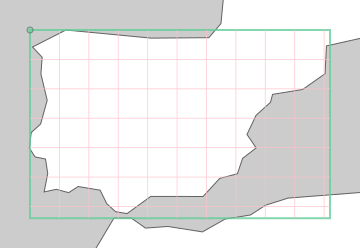

In [8]:
gbox = RegularLonLat.init_from_country("E", 1/4)
gbox.gbox

In [9]:
# define geometry
geometry = ee.Geometry.BBox(*gbox.bbox)
projection = ic.first().select(0).projection()
scale = None # 0.25 # km
crs = "EPSG:4326" # Coordinate Reference system

In [10]:
ds = xr.open_dataset(ic, engine='ee', crs=crs, scale=scale, projection=projection, geometry=geometry)
ds

<xarray.Dataset>
Dimensions:                     (time: 498, lon: 51, lat: 32)
Coordinates:
  * time                        (time) datetime64[ns] 1979-01-01 ... 2020-06-01
  * lon                         (lon) float32 -9.375 -9.125 ... 2.875 3.125
  * lat                         (lat) float32 43.62 43.38 43.12 ... 36.12 35.88
Data variables:
    mean_2m_air_temperature     (time, lon, lat) float32 ...
    minimum_2m_air_temperature  (time, lon, lat) float32 ...
    maximum_2m_air_temperature  (time, lon, lat) float32 ...
    dewpoint_2m_temperature     (time, lon, lat) float32 ...
    total_precipitation         (time, lon, lat) float32 ...
    surface_pressure            (time, lon, lat) float32 ...
    mean_sea_level_pressure     (time, lon, lat) float32 ...
    u_component_of_wind_10m     (time, lon, lat) float32 ...
    v_component_of_wind_10m     (time, lon, lat) float32 ...
Attributes: (12/35)
    date_range:               [283996800000, 1590969600000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594729140034009
    period:                   0
    product_tags:             ['wind', 'temperature', 'dewpoint', 'surface', ...
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Monthly mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

## Wrapper Function

In [11]:
ds = download_era5_gee("era5_monthly", gbox)
ds

<xarray.Dataset>
Dimensions:                     (time: 498, lon: 51, lat: 32)
Coordinates:
  * time                        (time) datetime64[ns] 1979-01-01 ... 2020-06-01
  * lon                         (lon) float32 -9.375 -9.125 ... 2.875 3.125
  * lat                         (lat) float32 43.62 43.38 43.12 ... 36.12 35.88
Data variables:
    mean_2m_air_temperature     (time, lon, lat) float32 ...
    minimum_2m_air_temperature  (time, lon, lat) float32 ...
    maximum_2m_air_temperature  (time, lon, lat) float32 ...
    dewpoint_2m_temperature     (time, lon, lat) float32 ...
    total_precipitation         (time, lon, lat) float32 ...
    surface_pressure            (time, lon, lat) float32 ...
    mean_sea_level_pressure     (time, lon, lat) float32 ...
    u_component_of_wind_10m     (time, lon, lat) float32 ...
    v_component_of_wind_10m     (time, lon, lat) float32 ...
Attributes: (12/35)
    date_range:               [283996800000, 1590969600000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594729140034009
    period:                   0
    product_tags:             ['wind', 'temperature', 'dewpoint', 'surface', ...
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Monthly mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

## Products

### Reanalysis

**ERA5 Land Product**
* Hourly - `ee://ECMWF/ERA5_LAND/HOURLY` ([gee-link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_HOURLY))
* Daily - `ee://ECMWF/ERA5_LAND/DAILY_AGGR` ([gee-link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_DAILY_AGGR))
* Monthly - `ee://ECMWF/ERA5_LAND/MONTHLY_AGGR` ([gee-link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_MONTHLY_AGGR))

**ERA5 Product**
* Daily - `ee://ECMWF/ERA5/DAILY` ([gee-link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_DAILY))
* Monthly - `ee://ECMWF/ERA5/MONTHLY` ([gee-link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_MONTHLY))

#### Ocean Reanalysis



**Sea Surface Height** - [HYCOM](https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_surface_elevation)

**Temperature & Salinity** - [HYCOM](https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_temp_salinity)

**Velocity** - [HYCOM](https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_water_velocity)

***

#### Satellites

**MODIS**
* [Ocean Reflectance](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MYDOCGA)

***

**GOES**

* GOES [16](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GOES_16_MCMIPF) | [17](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GOES_17_MCMIPF) | [18](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GOES_18_MCMIPF) - L2 Full Disk - Cloud & Moisture


**Ocean Colour** - [Sentinel-3 OLCI ERF](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S3_OLCI#description)

**Ocean Reflectance** - [MODIS TERRA](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MODOCGA) | [MODIS AQUA](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MYDOCGA)

**OI SST** - [NOAA CDR OISST](https://developers.google.com/earth-engine/datasets/catalog/NOAA_CDR_OISST_V2_1) - 1/4 deg